In [4]:
import pandas as pd
df = pd.read_csv('/home/user/workspaces/THU-timeseries/ETD/ETD.csv')
df = df.T
df_ts = df.iloc[2:]
df_label = df.iloc[1,:]
df_ts


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42332,42333,42334,42335,42336,42337,42338,42339,42340,42341,42342,42343,42344,42345,42346,42347,42348,42349,42350,42351,42352,42353,42354,42355,42356,42357,42358,42359,42360,42361,42362,42363,42364,42365,42366,42367,42368,42369,42370,42371
2014/1/1,NaN,NaN,NaN,NaN,2.9,NaN,0.11,0.91,NaN,11.02,NaN,NaN,1.91,5.2,0.0,6.03,19.92,9.52,NaN,0.02,6.6,32.31,98.52,0.4,29.9,34.28,6.59,NaN,6.76,NaN,NaN,16.22,15.56,2.85,0.0,NaN,NaN,7.54,0.0,0.0,...,6.52,0.35,NaN,NaN,1.38,NaN,8.75,0.77,NaN,1.95,0.22,0.02,0.0,NaN,18.31,NaN,NaN,NaN,NaN,23.26,NaN,33.5,0.0,36.35,21.23,2.03,0.9,0.0,NaN,NaN,NaN,148.4,0.0,5.22,NaN,NaN,2.7,0.58,16.89,NaN
2014/1/10,NaN,NaN,NaN,NaN,3.42,NaN,0.53,0.86,NaN,8.24,NaN,NaN,1.82,8.03,0.0,7.29,0.0,11.68,NaN,0.03,6.34,27.68,101.73,23.41,361.96,23.35,7.51,NaN,5.32,NaN,NaN,11.42,25.89,0.0,0.0,NaN,NaN,13.75,11.34,0.0,...,4.9,0.34,NaN,NaN,2.34,NaN,10.35,0.0,NaN,2.04,1.06,0.0,0.0,NaN,20.02,NaN,NaN,NaN,NaN,19.0,NaN,59.5,0.0,0.0,9.69,1.32,0.0,0.0,NaN,NaN,NaN,174.02,0.0,0.0,NaN,NaN,4.39,0.84,13.84,NaN
2014/1/11,NaN,NaN,NaN,NaN,3.81,NaN,0.45,1.1,NaN,7.94,NaN,NaN,1.07,8.11,0.0,4.86,0.0,14.09,NaN,0.01,5.11,15.25,99.51,15.35,476.34,30.85,8.4,NaN,6.34,NaN,NaN,14.33,21.05,3.69,0.0,NaN,NaN,10.59,12.87,0.0,...,4.96,0.43,NaN,NaN,2.55,NaN,10.95,0.6,NaN,2.02,0.19,0.04,11.16,NaN,21.73,NaN,NaN,NaN,NaN,20.17,NaN,24.5,0.0,0.0,8.78,1.78,0.0,0.0,NaN,NaN,NaN,122.26,0.0,15.96,NaN,NaN,3.95,1.61,13.5,NaN
2014/1/12,NaN,NaN,NaN,NaN,4.58,NaN,0.51,0.66,NaN,7.92,NaN,NaN,1.33,2.47,0.0,8.85,12.68,12.56,NaN,0.03,4.06,12.69,103.86,8.7,486.04,15.58,11.5,NaN,6.66,NaN,NaN,1.95,16.98,2.52,0.0,NaN,NaN,13.01,11.7,0.0,...,5.91,0.43,NaN,NaN,2.69,NaN,9.41,0.0,NaN,2.04,0.21,0.02,0.0,NaN,22.43,NaN,NaN,NaN,NaN,18.9,NaN,19.5,0.0,4.66,8.63,1.59,0.53,0.0,NaN,NaN,NaN,133.16,0.0,14.53,NaN,NaN,0.0,0.9,14.6,NaN
2014/1/13,NaN,NaN,NaN,NaN,3.56,NaN,1.32,5.82,NaN,8.31,NaN,NaN,1.97,1.51,0.0,5.73,15.48,11.71,NaN,0.02,1.13,22.9,96.67,8.39,503.43,0.0,8.49,NaN,4.37,NaN,NaN,0.17,24.76,2.8,0.0,NaN,NaN,9.39,13.85,0.0,...,5.0,0.43,NaN,NaN,3.9,NaN,11.58,2.03,NaN,2.02,0.92,0.03,11.96,NaN,20.78,NaN,NaN,NaN,NaN,18.7,NaN,57.0,0.0,5.09,9.41,2.25,0.8,0.0,NaN,NaN,NaN,173.65,0.0,15.43,NaN,NaN,0.0,0.6,14.46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016/9/5,18.05,0.0,NaN,18.57,14.68,3.23,1.36,4.61,2.77,108.69,5.03,5.81,15.18,15.56,0.0,12.25,13.54,15.04,11.29,20.46,7.46,52.55,99.01,23.21,13.52,20.64,2.89,23.64,0.0,0.0,21.92,13.33,29.25,12.64,44.37,5.0,3.27,16.62,5.27,27.74,...,3.05,0.19,2.92,7.85,2.9,0.06,6.79,5.77,0.0,14.8,19.2,0.06,11.37,0.22,52.4,5.03,0.0,7.66,3.39,9.12,7.29,192.0,8.54,23.5,7.05,2.55,1.63,7.21,0.0,3.92,13.08,283.51,1.83,4.75,1.29,3.77,4.58,4.28,18.11,12.04
2016/9/6,26.47,0.0,NaN,14.59,16.35,3.85,0.56,3.13,3.02,87.88,4.49,4.61,21.83,15.82,0.0,1.33,13.25,10.52,12.62,24.23,9.15,53.39,91.33,22.39,15.21,18.28,3.0,25.31,0.0,0.0,7.3,13.89,27.07,9.67,44.57,4.72,3.51,15.43,1.23,18.62,...,3.28,0.19,2.91,7.73,2.68,0.0,6.18,4.75,0.0,17.69,16.8,0.08,23.22,0.22,49.36,4.16,0.0,8.83,4.62,8.87,4.01,190.0,8.15,23.63,8.28,2.35,1.56,7.07,0.0,2.99,10.9,303.76,1.39,6.94,0.67,3.96,3.33,3.37,19.31,9.9
2016/9/7,18.75,0.0,NaN,12.82,18.14,2.78,1.02,3.1,4.06,86.36,5.1,4.78,24.3,14.67,0.32,0.08,14.18,10.54,9.14,20.67,8.73,57.62,105.04,22.29,20.06,18.53,2.95,24.59,0.0,0.0,21.15,6.56,34.78,6.21,44.09,10.26,3.34,20.53,4.88,24.61,...,2.45,1.13,2.93,7.31,2.71,0.0,7.29,5.61,0.0,13.11,17.98,0.74,14.16,0.21,44.35,4.97,0.0,6.93,5.31,10.03,4.08,169.5,7.44,29.41,5.74,2.15,1.41,9.24,0.0,5.0,11.57,285.34,7.5,4.55,0.76,3.64,3.19,6.67,17.48,8.23
2016/9/8,17.84,0.0,NaN,19.37,18.41,3.55,1.96,3.74,4.75,81.51,5.42,4.21,11.58,17.46,0.0,0.

In [6]:
df_ts.index = pd.to_datetime(df_ts.index)
df_ts = df_ts.sort_index()
df_ts

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42332,42333,42334,42335,42336,42337,42338,42339,42340,42341,42342,42343,42344,42345,42346,42347,42348,42349,42350,42351,42352,42353,42354,42355,42356,42357,42358,42359,42360,42361,42362,42363,42364,42365,42366,42367,42368,42369,42370,42371
2014-01-01,NaN,NaN,NaN,NaN,2.9,NaN,0.11,0.91,NaN,11.02,NaN,NaN,1.91,5.2,0.0,6.03,19.92,9.52,NaN,0.02,6.6,32.31,98.52,0.4,29.9,34.28,6.59,NaN,6.76,NaN,NaN,16.22,15.56,2.85,0.0,NaN,NaN,7.54,0.0,0.0,...,6.52,0.35,NaN,NaN,1.38,NaN,8.75,0.77,NaN,1.95,0.22,0.02,0.0,NaN,18.31,NaN,NaN,NaN,NaN,23.26,NaN,33.5,0.0,36.35,21.23,2.03,0.9,0.0,NaN,NaN,NaN,148.4,0.0,5.22,NaN,NaN,2.7,0.58,16.89,NaN
2014-01-02,NaN,NaN,NaN,NaN,5.64,NaN,0.11,1.16,NaN,7.92,NaN,NaN,2.11,2.35,0.0,3.18,14.81,9.36,NaN,0.02,5.64,26.91,95.9,0.35,55.78,15.08,6.48,NaN,6.73,NaN,NaN,11.45,22.23,3.63,0.0,NaN,NaN,14.54,0.0,0.0,...,5.34,0.32,NaN,NaN,0.85,NaN,7.47,0.83,NaN,1.95,0.71,0.05,10.9,NaN,18.78,NaN,NaN,NaN,NaN,24.57,NaN,62.5,0.0,6.72,11.34,2.82,2.07,0.0,NaN,NaN,NaN,159.86,0.0,5.04,NaN,NaN,0.0,1.16,15.15,NaN
2014-01-03,NaN,NaN,NaN,NaN,6.99,NaN,0.25,0.75,NaN,8.41,NaN,NaN,1.69,2.56,0.01,3.33,13.11,11.21,NaN,0.01,6.37,19.83,100.51,0.37,45.65,18.64,8.26,NaN,5.59,NaN,NaN,13.33,18.2,0.0,0.0,NaN,NaN,10.11,0.0,0.0,...,3.92,0.43,NaN,NaN,1.08,NaN,10.29,1.76,NaN,1.98,0.92,0.01,0.0,NaN,16.23,NaN,NaN,NaN,NaN,24.25,NaN,52.0,0.0,4.41,9.3,1.93,0.54,0.0,NaN,NaN,NaN,157.2,0.0,4.92,NaN,NaN,0.0,0.92,19.28,NaN
2014-01-04,NaN,NaN,NaN,NaN,3.32,NaN,0.27,1.3,NaN,9.66,NaN,NaN,1.72,1.46,0.0,7.26,14.51,13.45,NaN,0.03,6.83,15.61,123.92,0.42,58.17,15.7,7.39,NaN,6.57,NaN,NaN,14.51,19.27,0.0,0.0,NaN,NaN,12.28,0.0,0.0,...,4.6,0.43,NaN,NaN,1.02,NaN,7.86,0.0,NaN,2.03,0.52,0.0,9.53,NaN,17.77,NaN,NaN,NaN,NaN,0.0,NaN,22.0,0.0,1.26,10.02,2.13,0.58,0.0,NaN,NaN,NaN,104.8,0.0,4.88,NaN,NaN,5.72,0.98,17.19,NaN
2014-01-05,NaN,NaN,NaN,NaN,3.61,NaN,0.21,0.74,NaN,9.86,NaN,NaN,1.31,2.04,0.0,6.36,15.43,12.2,NaN,0.28,6.92,16.07,92.29,0.48,36.21,23.89,0.0,NaN,5.16,NaN,NaN,13.66,18.88,0.0,0.0,NaN,NaN,9.15,0.0,0.0,...,4.14,0.3,NaN,NaN,0.95,NaN,7.32,0.98,NaN,3.01,0.2,0.01,16.12,NaN,17.83,NaN,NaN,NaN,NaN,23.79,NaN,21.0,4.33,0.0,11.91,1.81,0.55,0.0,NaN,NaN,NaN,118.17,0.0,13.59,NaN,NaN,6.05,1.54,16.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-27,8.75,0.0,19.09,20.79,6.73,0.42,1.18,3.82,3.14,57.22,0.0,4.59,12.22,15.89,0.89,0.0,11.65,9.68,14.88,8.94,6.16,57.57,116.15,7.72,15.01,11.18,3.12,25.14,0.0,0.0,3.61,7.11,19.85,7.15,26.33,3.8,0.96,10.83,2.41,14.8,...,2.68,0.2,2.82,8.22,2.85,0.0,8.76,7.46,0.0,NaN,14.06,NaN,8.54,0.22,35.74,2.87,NaN,5.39,4.16,8.61,5.04,173.0,5.41,35.18,5.8,2.29,2.15,6.52,0.0,8.6,11.85,236.22,2.5,6.78,0.82,2.83,4.64,0.51,11.15,7.96
2016-10-28,9.3,0.0,18.56,17.95,7.52,1.91,1.13,2.75,3.65,56.68,0.0,4.71,16.39,13.0,0.35,0.26,10.96,8.95,10.2,9.41,7.16,61.4,10.46,10.41,46.61,14.93,3.75,21.48,0.0,0.0,7.93,13.28,20.43,8.59,19.06,7.79,4.19,11.32,3.48,19.28,...,2.15,0.19,2.84,5.28,2.58,0.0,8.39,6.13,0.0,NaN,16.66,NaN,8.66,0.22,38.5,2.92,NaN,5.36,3.06,7.03,4.41,167.5,6.19,38.41,7.24,2.22,1.43,8.14,0.0,4.23,11.46,243.06,2.74,7.83,0.65,2.54,3.71,0.79,12.22,8.13
2016-10-29,7.54,0.0,16.25,19.26,10.89,0.42,1.34,2.96,3.7,45.28,0.0,5.62,12.14,14.8,0.38,0.45,13.34,8.51,8.18,7.3,6.66,40.12,97.64,8.41,50.38,16.81,4.12,22.35,0.0,0.0,7.81,11.09,22.35,3.43,17.38,8.92,NaN,12.2,2.89,16.1,...,3.13,0.19,2.82,7.3,1.95,0.0,8.19,7.2,0.0,12.91,17.48,NaN,8.24,0.22,32.12,3.46,NaN,4.87,4.21,8.41,6.2,23.0,6.12,26.18,5.67,2.34,0.97,7.35,0.0,3.54,8.98,114.47,4.55,14.42,0.53,3.4,6.22,0.66,13.16,11.5
2016-10-30,9.16,0.0,14.2,14.46,9.86,0.38,1.26,3.67,5.08,44.04,0.0,6.83,10.82,14.91,0.7,0.36,9.91,8.4,12.69,6.77

In [18]:
keep_id = df_ts.notna().astype(int).sum()/len(df_ts) >= 0.95
df_ts_full = df_ts[df_ts.columns[keep_id]]
df_ts_full

,4,6,7,13,14,16,17,19,24,28,31,33,37,39,42,47,51,52,58,59,62,67,70,71,77,83,89,95,96,97,98,99,102,106,108,112,113,116,118,119,...,42269,42271,42273,42275,42277,42279,42281,42282,42285,42289,42291,42296,42297,42298,42302,42304,42312,42314,42316,42320,42321,42322,42323,42324,42327,42330,42331,42336,42339,42341,42342,42344,42346,42351,42355,42357,42359,42363,42365,42369
2014-01-01,2.9,0.11,0.91,5.2,0.0,19.92,9.52,0.02,29.9,6.76,16.22,2.85,7.54,0.0,1.71,0.28,9.3,5.96,2.27,8.74,87.82,NaN,92.19,0.0,18.33,16.29,9.07,1.19,0.0,6.07,0.0,38.69,1020.8,12.66,0.0,7.61,0.0,9.53,0.0,3.39,...,0.0,7.67,10.29,0.0,4.33,0.0,5.93,0.0,0.0,8.5,0.0,0.0,0.0,0.0,14.47,1.81,6.8,0.0,10.92,6.3,12.84,0.0,4.5,1.72,0.0,0.0,3.6,1.38,0.77,1.95,0.22,0.0,18.31,23.26,36.35,2.03,0.0,148.4,5.22,0.58
2014-01-02,5.64,0.11,1.16,2.35,0.0,14.81,9.36,0.02,55.78,6.73,11.45,3.63,14.54,0.0,1.64,0.33,10.95,9.0,2.51,8.49,62.19,NaN,60.7,3.56,14.44,14.93,9.66,1.15,1.74,4.35,0.0,46.17,1097.4,6.16,0.0,8.4,0.0,8.86,0.0,3.5,...,0.0,7.3,7.45,0.0,4.83,0.0,10.39,11.92,0.0,8.67,0.0,0.0,0.0,0.01,16.17,1.83,8.56,0.0,15.96,7.85,9.26,0.0,4.81,1.58,0.0,0.0,3.76,0.85,0.83,1.95,0.71,10.9,18.78,24.57,6.72,2.82,0.0,159.86,5.04,1.16
2014-01-03,6.99,0.25,0.75,2.56,0.01,13.11,11.21,0.01,45.65,5.59,13.33,0.0,10.11,0.0,1.58,0.56,10.69,5.08,2.65,7.24,59.27,NaN,59.18,0.0,13.2,13.58,11.44,0.89,5.57,5.11,0.0,47.27,1377.4,7.61,0.0,0.0,0.0,8.18,0.0,0.0,...,0.0,5.86,7.66,0.0,4.63,0.0,15.37,11.12,0.0,7.27,0.0,0.0,0.0,0.02,19.38,1.88,8.3,0.0,10.23,8.4,8.92,0.0,6.81,2.57,0.0,0.0,2.86,1.08,1.76,1.98,0.92,0.0,16.23,24.25,4.41,1.93,0.0,157.2,4.92,0.92
2014-01-04,3.32,0.27,1.3,1.46,0.0,14.51,13.45,0.03,58.17,6.57,14.51,0.0,12.28,0.0,2.48,1.0,13.15,4.7,7.99,8.18,59.67,NaN,62.09,0.0,11.26,14.5,8.42,0.93,7.45,5.31,0.0,42.33,1408.8,6.9,8.58,0.0,0.0,8.3,0.0,0.0,...,0.0,6.8,11.4,0.0,5.52,0.0,8.27,9.99,0.0,5.47,0.0,0.0,0.0,0.01,18.33,1.6,8.47,0.0,9.1,8.72,8.77,0.0,7.08,1.76,0.0,0.0,3.46,1.02,0.0,2.03,0.52,9.53,17.77,0.0,1.26,2.13,0.0,104.8,4.88,0.98
2014-01-05,3.61,0.21,0.74,2.04,0.0,15.43,12.2,0.28,36.21,5.16,13.66,0.0,9.15,0.0,1.5,0.19,10.54,4.78,5.17,6.63,73.75,NaN,78.03,1.8,18.98,14.54,7.12,0.95,3.31,5.51,0.0,42.83,1414.8,5.86,9.76,0.0,0.0,7.5,0.0,0.0,...,0.0,6.18,8.77,0.0,4.51,0.0,13.3,12.17,0.0,9.16,0.0,0.0,0.0,0.02,22.05,1.44,8.47,0.0,10.74,6.55,10.02,0.0,9.11,0.0,0.0,0.0,4.63,0.95,0.98,3.01,0.2,16.12,17.83,23.79,0.0,1.81,0.0,118.17,13.59,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-27,6.73,1.18,3.82,15.89,0.89,11.65,9.68,8.94,15.01,0.0,7.11,7.15,10.83,14.8,1.71,25.42,1.81,0.93,8.49,16.09,41.01,12.52,148.35,8.0,8.05,23.07,15.63,4.97,1.08,9.53,19.85,18.01,366.8,19.46,5.3,7.45,16.04,19.27,0.0,5.4,...,5.94,12.76,14.36,0.0,2.84,NaN,4.93,8.12,0.0,8.51,0.01,0.0,15.67,0.0,23.75,2.32,6.43,0.0,5.71,6.72,9.56,0.0,12.41,2.01,0.04,0.0,8.01,2.85,7.46,NaN,14.06,8.54,35.74,8.61,35.18,2.29,6.52,236.22,6.78,0.51
2016-10-28,7.52,1.13,2.75,13.0,0.35,10.96,8.95,9.41,46.61,0.0,13.28,8.59,11.32,19.28,1.43,34.48,3.32,1.06,8.4,12.59,42.03,13.88,146.3,6.21,9.89,20.54,14.72,6.3,1.0,9.5,18.66,26.84,748.8,22.83,4.6,7.88,18.13,22.78,0.0,5.68,...,5.24,13.39,10.28,0.0,3.28,NaN,6.82,8.6,0.0,8.25,0.0,0.0,14.94,0.25,22.73,1.81,6.92,0.0,6.78,4.6,9.12,0.0,11.84,2.19,0.11,0.0,7.68,2.58,6.13,NaN,16.66,8.66,38.5,7.03,38.41,2.22,8.14,243.06,7.83,0.79
2016-10-29,10.89,1.34,2.96,14.8,0.38,13.34,8.51,7.3,50.38,0.0,11.09,3.43,12.2,16.1,2.59,23.62,2.94,1.05,7.61,11.67,48.6,17.67,136.07,6.91,5.07,24.43,16.72,5.4,1.16,12.2,19.11,11.53,673.4,23.82,8.63,7.24,16.6,16.08,0.0,5.49,...,3.73,15.25,10.36,0.0,3.45,0.0,1.73,9.31,0.0,6.73,0.01,0.0,12.01,0.15,8.96,1.98,5.36,0.0,6.38,3.13,7.0,7.91,11.08,2.44,0.03,0.0,9.29,1.95,7.2,12.91,17.48,8.24,32.12,8.41,26.18,2.34,7.35,114.47,1

In [19]:
df_label_full = df_label[df_ts.columns[keep_id]]

<Axes: >

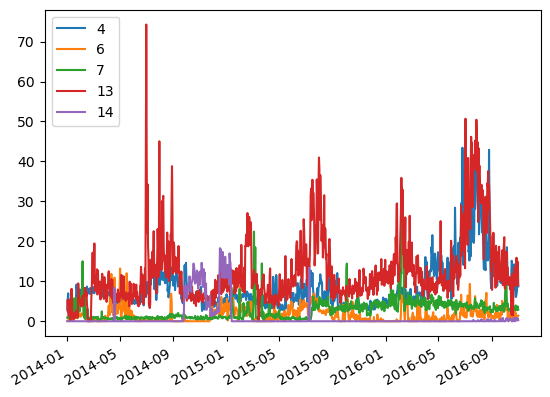

In [23]:
df_ts_full = df_ts_full.astype(float)

df_ts_full = df_ts_full.interpolate(axis=1)

df_ts_full.iloc[:, :5].plot()

In [30]:
(df_label_full == 1).astype(int).sum()

1121

145
Super-Resolution Task
(7588, 1)
test 798
Super-Resolution Task
(7588, 1)
test 798
Super-Resolution Task
(7588, 1)
test 798
Super-Resolution Task
(7588, 1)
test 798


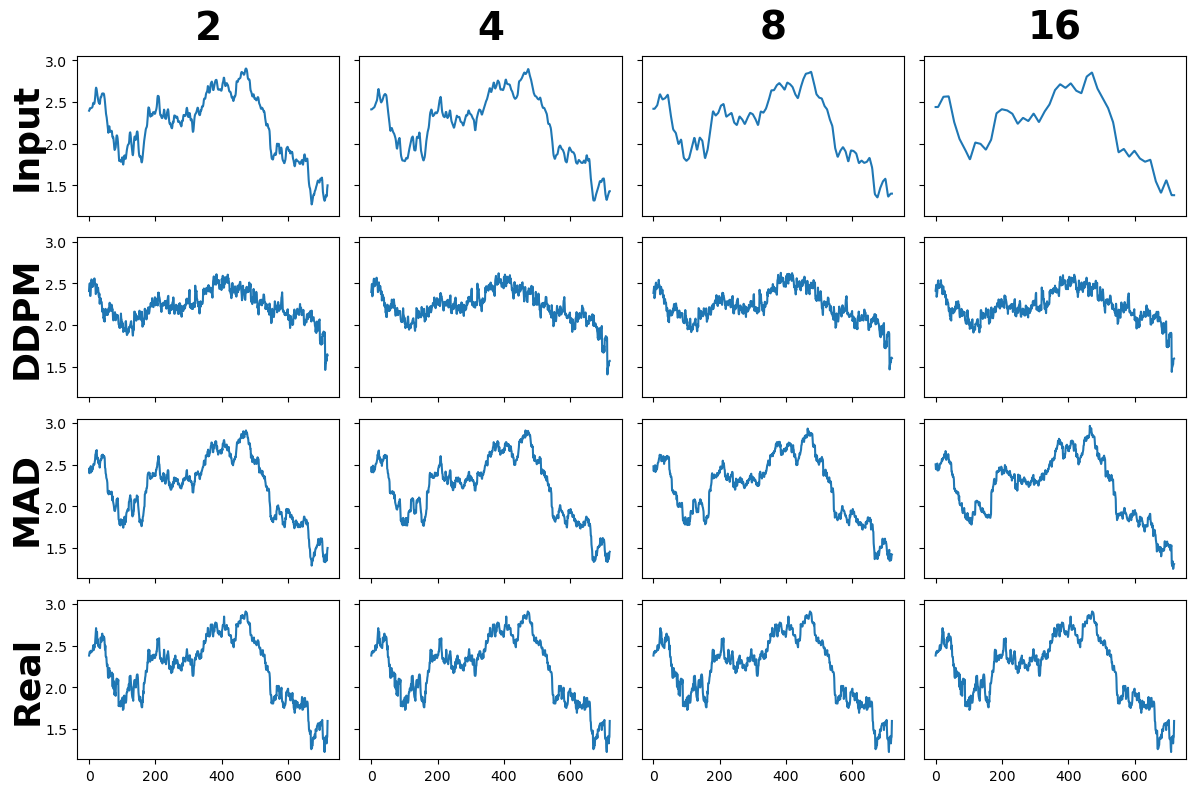

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml
from src.datamodule.data_factory import data_provider
import torch

root_pth = "../savings/MAD_sr/savings"
# kernel_size = [2, 4, 8, 16]
kernel_size = [2, 4, 8, 16]
fig, axs = plt.subplots(
    4, len(kernel_size), sharex=True,sharey=True, figsize=[len(kernel_size) * 3, 4 * 2]
)


# cols = ["5%","Bottom 10%","Middle","Top 90%","95%"]
cols = kernel_size
# cols = ["Bottom 10%","Middle","Top 10%"]
# rows = appear_names
rows = ["Input", "DDPM", "MAD", "Real"]

pad = 5

for ax, col in zip(axs[0, :], cols):
    ax.annotate(
        col,
        xy=(0.5, 1.15),
        xytext=(0, -pad),
        xycoords="axes fraction",
        textcoords="offset points",
        weight="bold",
        size=28,
        ha="center",
        va="baseline",
    )

for ax, row in zip(axs[:, 0], rows):
    if row == "Proposed":
        color = "black"
        alpha = 0.75
        size = 28
    else:
        color = "black"
        alpha = 1
        size = 26
    ax.annotate(
        row,
        xy=(-0.1, 0.5),
        xytext=(-pad, 0),
        xycoords="axes fraction",
        textcoords="offset points",
        weight="bold",
        rotation=90,
        size=size,
        ha="right",
        va="center",
        color=color,
        alpha=alpha,
    )


dataset = "exchange_rate"
pred_len = 576 if dataset == "mfred" else 720
model_name = "MADTC_NFD_DIT_eps_bs64_condNone_ksNone"
m_name = ["mse", "lsd", "con_err", "lps_st", "lps_lt"]
data_config = yaml.safe_load(open(f"../configs/dataset/{dataset}.yaml", "r"))
data_config["condition"] = "sr"
data_config["pred_len"] = pred_len
# MADTC
all_ks_metric_pro = []
all_ks_metric_base = []
max_choose = 700 if dataset == "exchange_rate" else 1024
# choose = 555
choose = np.random.randint(0, max_choose)
print(choose)
for i, ks in enumerate(kernel_size):
    ddpm_data = np.load(
        os.path.join(
            root_pth,
            f"{dataset}_{pred_len}_S",
            f"DDPM_bs64_condsr_ks{ks}",
            f"cond_sr_startks_{ks}_fast_False_dtm_True_pred.npy",
        )
    )
    mad_data = np.load(
        os.path.join(
            root_pth,
            f"{dataset}_{pred_len}_S",
            model_name,
            f"cond_sr_startks_{ks}_fast_False_dtm_True_pred.npy",
        )
    )

    data_config["kernel_size"] = ks
    _, test_dl = data_provider(data_config, "test")
    batch = next(iter(test_dl))
    linear_interp, y_real = (batch["c"], batch["x"])
    axs[0, i].plot(linear_interp[choose].flatten())
    axs[1, i].plot(ddpm_data[choose].flatten())
    axs[2, i].plot(mad_data[choose].flatten())
    axs[3, i].plot(y_real[choose].flatten())
fig.tight_layout()